# Explore and preprocess EURUSD data

First, import all necessary libraries and the data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display
%matplotlib inline

# Import data
data = pd.read_csv('data/EURUSD_M5_438K.csv')

In [2]:
# Lets transform the time column into a datetime "type"
from datetime import datetime
data['time'] = pd.to_datetime(data['time'], format='%Y_%m_%d_%H_%M_%S')

Let's see some random points in our data

In [3]:
data.sample(5)

,time,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
431689,2017-10-26 11:40:00,1.18156,1.18133,1.18169,1.18131,26.031294,26.098630,-0.000263,-0.000265,0.000002
418210,2017-08-22 10:30:00,1.17864,1.17896,1.17920,1.17848,24.644550,22.268544,-0.000366,-0.000355,-0.000011
55968,2012-10-02 00:55:00,1.28898,1.28897,1289.00000,1.28895,66.067416,63.209541,0.000058,0.000015,0.000043
198839,2014-09-10 02:20:00,1.29503,1.29464,1.29510,1.29461,58.447489,49.952915,0.000190,0.000092,0.000098
290129,2015-12-03 01:10:00,1.06091,1.06072,1.06091,1.06072,27.740864,22.167943,-0.000130,-0.000123,-0.000007


Everything looks normal. Now let's view some statistics of our data using the handy `'descibe'` function of pandas

In [4]:
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,4.386400e+05,4.386400e+05,4.386400e+05
mean,11.677773,11.433027,12.063090,12.166126,134.182677,49.698128,-1.765522e-06,-1.763238e-06,-2.284511e-09
std,112.502253,111.153666,114.504286,115.457485,2200.830566,20.736170,4.321818e-04,4.258041e-04,1.043231e-04
min,1.034490,1.034490,1.035800,1.032490,1.630600,2.267673,-7.438083e-03,-7.053718e-03,-2.186876e-03
25%,1.115130,1.115130,1.115360,1.114910,32.248521,32.615648,-1.701806e-04,-1.677128e-04,-4.389836e-05
50%,1.224350,1.224290,1.224910,1.223970,49.721857,49.668944,-6.156445e-07,-6.989657e-07,1.129529e-07
75%,1.317343,1.317300,1.317640,1.317120,67.261905,66.760663,1.678373e-04,1.654748e-04,4.396166e-05
max,1394.000000,1395.000000,1395.000000,1393.000000,90625.000000,97.330773,7.210471e-03,6.871573e-03,2.316783e-03


There seems to be some strange outliers in the first 5 columns, let's see the data in a plot.

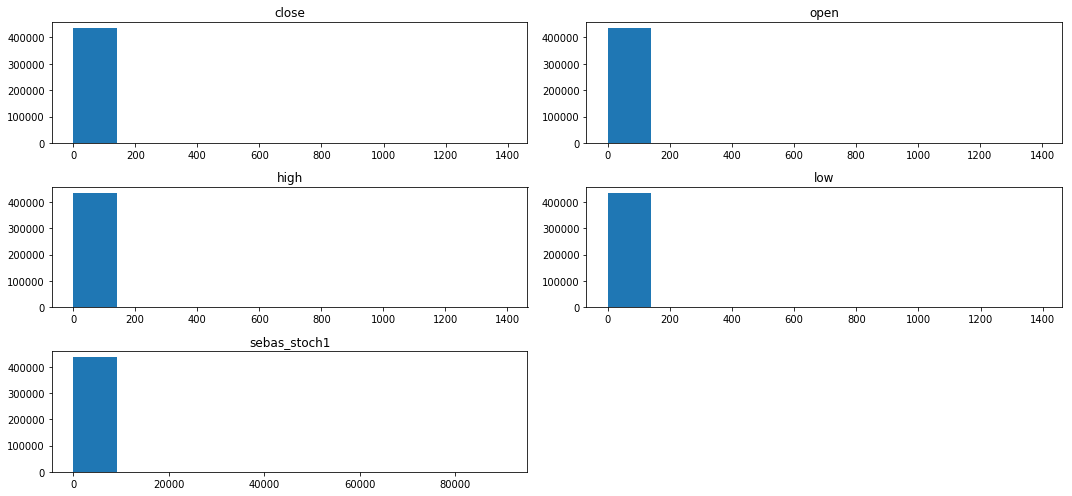

In [5]:
def plot_data(data):
    fig = plt.figure(figsize=(15,7))
    for i in range(1,6):
        ax = fig.add_subplot(320 + i)
        ax.hist(data[data.columns[i]], label='a')
        ax.title.set_text(data.columns[i])
    plt.tight_layout()
    plt.show()

plot_data(data)

Clearly the outliers are distorting the plots. Let's take a look at the data by ordering the dataframe

In [6]:
data.sort_values('close', ascending=False)[:10]

,time,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
162784,2014-03-17 15:10:00,1394.0,1.39362,1.39474,1.39362,84.084605,84.374454,0.001087,9.556372e-04,0.000132
163188,2014-03-19 00:50:00,1393.0,1.39298,1.39313,1.39296,50.597610,56.813581,-0.000019,1.048499e-06,-0.000020
163191,2014-03-19 01:05:00,1393.0,1.39302,1.39309,1.39290,33.333333,38.387274,-0.000039,-2.218170e-05,-0.000016
162946,2014-03-18 04:40:00,1393.0,1.39317,1.39317,1393.00000,52.358491,65.922716,0.000024,5.689254e-05,-0.000033
162960,2014-03-18 05:50:00,1393.0,1.39306,1.39307,1.39296,42.574257,39.801707,-0.000038,-3.233105e-05,-0.000006
163215,2014-03-19 03:05:00,1393.0,1.39301,1.39305,1.39296,58.924205,55.002733,0.000009,-6.256998e-07,0.000010
162532,2014-03-14 16:10:00,1392.0,1.39211,1.39218,1.39177,33.309144,38.797102,0.000738,9.172652e-04,-0.000180
162831,2014-03-17 19:05:00,1392.0,1.39232,1.39234,1.39188,32.129032,43.410238,-0.000074,3.012421e-05,-0.000105
173396,2014-05-08 00:05:00,1391.0,1.39113,1.39113,1.39098,38.095238,40.312668,-0.000069,-7.683169e-05,0.000007
168214,2014-04-11 16:40:00,1389.0,1.38894,1.38904,1.38874,71.346154,70.295409,0.000299,2.688316e-04,0.000030


So, the problem with our data seems to be with numbers that had too few decimals and for some reason they were treated as integers instead of decimal float values. We'll change these values dividing them by 1000.

In [7]:
# we will modify only the affected columns' values
for j in range(1,6):
    # to speed things up we first sort the column, so we don't compare to all the rows
    data_sorted = data.sort_values(data.columns[j], ascending=False, inplace=False)
    
    for i, row in data_sorted.iterrows():
        if row[j] > 1000:
            data.iloc[i, j] /= 1000
        else:
            # break loop for this column
            break
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,4.386400e+05,4.386400e+05,4.386400e+05
mean,1.214765,1.214765,1.214996,1.214536,49.698135,49.698128,-1.765522e-06,-1.763238e-06,-2.284511e-09
std,0.108256,0.108256,0.108240,0.108271,21.160887,20.736170,4.321818e-04,4.258041e-04,1.043231e-04
min,1.034490,1.034490,1.035800,1.032490,1.630600,2.267673,-7.438083e-03,-7.053718e-03,-2.186876e-03
25%,1.114840,1.114840,1.115048,1.114660,32.215947,32.615648,-1.701806e-04,-1.677128e-04,-4.389836e-05
50%,1.218005,1.218010,1.218210,1.217825,49.659864,49.668944,-6.156445e-07,-6.989657e-07,1.129529e-07
75%,1.315770,1.315770,1.316020,1.315520,67.167382,66.760663,1.678373e-04,1.654748e-04,4.396166e-05
max,1.398770,1.398760,1.399320,1.397430,97.812391,97.330773,7.210471e-03,6.871573e-03,2.316783e-03


Our data looks alright, we can plot again to verify. But just looking at the standard deviation we can see that the changes made a big impact

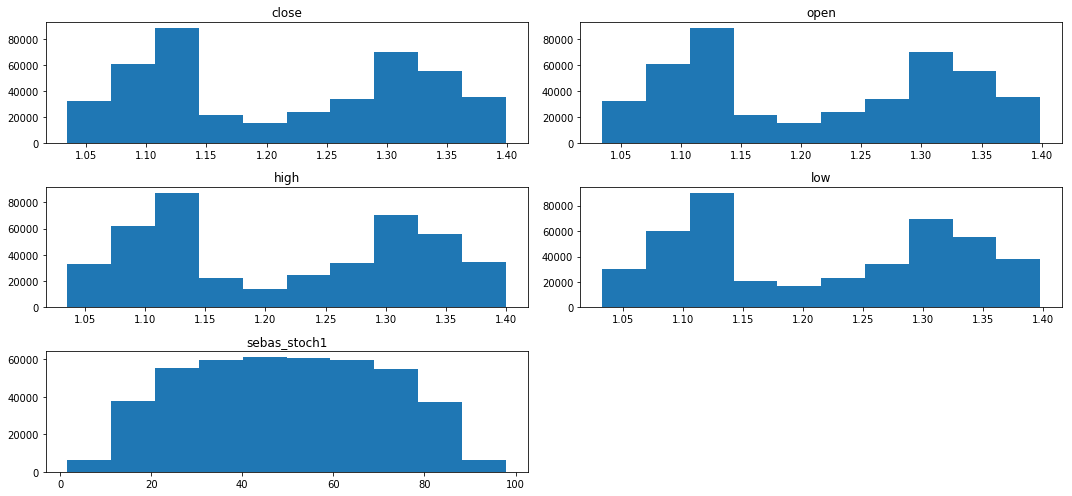

In [8]:
plot_data(data)

Indeed, much better! Now we output this data to a new file

In [10]:
data.to_csv('data/EURUSD_M5_438K_Preprocessed.csv', index=False)